In [11]:
import pandas as pd
df = pd.read_excel("kechki.xlsx", header=None)
work_data = df.iloc[:, 3]
print("'work' jadvalidagi barcha so'zlar:")
for word in work_data:
    print(word)



'work' jadvalidagi barcha so'zlar:
nan
work
 Web-ilovalarni ishlab chiqish vositalari.
Web saytlar ishlab chiqish uchun Adobe dasturidan foydalanish
Internetga ulanish usullari.Provayderlar va ularning xizmatlari.
Web-sahifalarda murakkab matematik formulalardan foydalanish.
Kompyuter grafikasining asosiy elementlari.
Rastrli grafik fayllarning formatlari va tavsifi.
Rastrli grafikaning afzalliklari va kamchiliklari tahlili.  
Rastrli tasvirlarda rang chuqurlini tushunchasi.
HTML tilida ranglar bilan ishlash.
CorelDraw dasturiy paketining xususiyatlari.
CorelDraw dasturining uskunalar paneli va vazifalari.
CorelDraw dasturida yangi oyna ochish. Instrument panellari va ularning vazifalari.
CorelDraw dasturida kontur chiziqlar chizish. Tekis ikki o‘lchamli shakllar chizish usullari.
CorelDraw dasturida ranglar va effektlar bilan ishlash. Perspektiv tasvirlar ishlash.
HTML tilining matnlar bilan ishlash imkoniyatlari
HTML tilining multimedia imkoniyatlari. 
Corel Draw dasturida vizitkalar

In [16]:
import pandas as pd
from itertools import combinations

def tokenize(text):
    # Tokenize text into words
    words = text.lower().split()
    return words

def calculate_similarity(word1, word2):
    set1 = set(word1)
    set2 = set(word2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    similarity = intersection / union if union != 0 else 0
    return similarity
df = pd.read_excel("kechki.xlsx", header=None)
work_data = df.iloc[:, 3]

all_words = [word for row in work_data for word in tokenize(str(row))]
word_combinations = combinations(all_words, 2)
similarities = {}
for word1, word2 in word_combinations:
    similarity_score = calculate_similarity(word1, word2)
    if word1 not in similarities:
        similarities[word1] = {}
    similarities[word1][word2] = similarity_score
sorted_words = sorted(similarities.keys(), key=lambda x: max(similarities[x].values()), reverse=True)
print("Sorted words by similar ones:")
for word in sorted_words:
    print(word)


Sorted words by similar ones:
nan
ishlab
chiqish
va
ularning
asosiy
rastrli
html
tilida
ranglar
bilan
ishlash.
coreldraw
dasturining
vazifalari.
dasturida
usullari.
effektlar
tilining
ishlash
corel
draw
grafikada
atrof
muhitning
shakllanishi
tasvirlash
yaratish.
elementlarini
dasturi
3d
foydalanish
imkoniyatlari
dasturidan
elementlari.
tayyorlash.
grafikasining
grafikaning
tasvirlarda
dasturiy
uskunalar
tasvirlar
material
shriftlar
grafik
paneli
ularni
chizish.
rang
joylashtirish
qayta
vositalari.
internetga
effektlar).
effektlarni
dasturning
imkoniyatlari.
saytlar
ulanish
web-sahifalarda
matnlar
boshqalar).
tashkil
formatlari
tahlili.
yangi
ochish.
(tuman,
manbailarini
usuli.
loyihalash
paketining
xususiyatlari.
gipermatn
boshqarish.fon
foydalanish.
fayllarning
afzalliklari
panellari
chizish
multimedia
autodesk
3ds
sahnani
qilish
komponentlari.
uskunalari
tayyorlash
teglari.formalar
xizmatlari.
modellashtirish
matematik
tekis
shakllar
sozlash.
kamchiliklari
chuqurlini
instrument
(saly

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df = pd.read_excel("kechki.xlsx", header=None)
work_data = df.iloc[:, 3]
sentences = [str(sentence) for sentence in work_data]
vectorizer = CountVectorizer()
sentence_matrix = vectorizer.fit_transform(sentences)
cosine_similarities = cosine_similarity(sentence_matrix, sentence_matrix)
sorted_indices = sorted(range(len(cosine_similarities[0])), key=lambda x: cosine_similarities[0][x], reverse=True)

# Print sorted sentences
print("Sorted sentences by similar ones:")
for index in sorted_indices:
    print(sentences[index])


Sorted sentences by similar ones:
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
work
 Web-ilovalarni ishlab chiqish vositalari.
Web saytlar ishlab chiqish uchun Adobe dasturidan foydalanish
Internetga ulanish usullari.Provayderlar va ularning xizmatlari.
Web-sahifalarda murakkab matematik formulalardan foydalanish.
Kompyuter grafikasining asosiy elementlari.
Rastrli grafik fayllarning formatlari va tavsifi.
Rastrli grafikaning afzalliklari va kamchiliklari tahlili.  
Rastrli tasvirlarda rang chuqurlini tushunchasi.
HTML tilida ranglar bilan ishlash.
CorelDraw dasturiy paketining xususiyatlari.
CorelDraw dasturining uskunalar paneli va vazifalari.
CorelDraw dasturida yangi oyna ochish. Instrument panellari va ularning vazifalari.
CorelDr

In [14]:
import pandas as pd

df = pd.read_excel("kechki.xlsx", header=None)

work_data = df.iloc[:, 3]
work_data = work_data.dropna()

sentences = [str(sentence) for sentence in work_data]
similarities = []
for i, sentence1 in enumerate(sentences):
    for j, sentence2 in enumerate(sentences):
        if i != j:
            words1 = set(sentence1.split())
            words2 = set(sentence2.split())
            intersection = len(words1.intersection(words2))
            union = len(words1.union(words2))
            similarity = intersection / union if union != 0 else 0
            similarities.append(((i, j), similarity))
            
sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
num_pairs = len(sorted_similarities)
num_selected_pairs = int(0.1 * num_pairs)
selected_pairs = sorted_similarities[:num_selected_pairs]
sorted_selected_pairs = sorted(selected_pairs, key=lambda x: x[0])

print("Ketma-ket o'xshash jumlalar (10% ko'rsatkichda):")
for (index1, index2), similarity in sorted_selected_pairs:
    print("1-so'z:", sentences[index1])
    print("2-so'z:", sentences[index2])
    print("o'xshashlik:", similarity)
    print("-" * 20)


Ketma-ket o'xshash jumlalar (10% ko'rsatkichda):
1-so'z:  Web-ilovalarni ishlab chiqish vositalari.
2-so'z: Web saytlar ishlab chiqish uchun Adobe dasturidan foydalanish
o'xshashlik: 0.2
--------------------
1-so'z:  Web-ilovalarni ishlab chiqish vositalari.
2-so'z: Saytning  texnik  topshirig‘ini  ishlash  chiqish  loyihalash bosqichlari.
o'xshashlik: 0.1
--------------------
1-so'z: Web saytlar ishlab chiqish uchun Adobe dasturidan foydalanish
2-so'z:  Web-ilovalarni ishlab chiqish vositalari.
o'xshashlik: 0.2
--------------------
1-so'z: Internetga ulanish usullari.Provayderlar va ularning xizmatlari.
2-so'z: Rastrli grafik fayllarning formatlari va tavsifi.
o'xshashlik: 0.09090909090909091
--------------------
1-so'z: Internetga ulanish usullari.Provayderlar va ularning xizmatlari.
2-so'z: Rastrli grafikaning afzalliklari va kamchiliklari tahlili.  
o'xshashlik: 0.09090909090909091
--------------------
1-so'z: Internetga ulanish usullari.Provayderlar va ularning xizmatlari.
2-so'z:

In [19]:
import pandas as pd

df = pd.read_excel("kechki.xlsx", header=None)
work_data = df.iloc[:, 3]

work_data = work_data.dropna()

sentences = [str(sentence) for sentence in work_data]

similarities = []
for i, sentence1 in enumerate(sentences):
    for j, sentence2 in enumerate(sentences):
        if i != j:
            words1 = set(sentence1.split())
            words2 = set(sentence2.split())
            intersection = len(words1.intersection(words2))
            union = len(words1.union(words2))
            similarity = intersection / union if union != 0 else 0
            similarities.append(((i, j), similarity))

similarity_range = (0.40, 0.85)

selected_pairs = []
for (index1, index2), similarity in similarities:
    if similarity >= similarity_range[0] and similarity <= similarity_range[1]:
        selected_pairs.append(((index1, index2), similarity))

sorted_selected_pairs = sorted(selected_pairs, key=lambda x: x[0])

print(f"Sequential similar sentences ({int((similarity_range[0]*100))}% to {int((similarity_range[1]*100))}% in order):")
for (index1, index2), similarity in sorted_selected_pairs:
    print("1-so'z:", sentences[index1])
    print("2-so'z:", sentences[index2])
    print("o'xshashlik:", similarity)
    print("-" * 20)


Sequential similar sentences (40% to 85% in order):
1-so'z: Rastrli grafikada atrof muhitning shakllanishi (tuman, alanga, qor).
2-so'z: Rastrli grafikada atrof muhitning shakllanishi (salyutlar, bulutlar, video effektlar).
o'xshashlik: 0.4166666666666667
--------------------
1-so'z: Rastrli grafikada atrof muhitning shakllanishi (salyutlar, bulutlar, video effektlar).
2-so'z: Rastrli grafikada atrof muhitning shakllanishi (tuman, alanga, qor).
o'xshashlik: 0.4166666666666667
--------------------
1-so'z: Corel Draw dasturida QR Cod yaratish.
2-so'z: Corel Draw dasturida infografika elementlarini yaratish.
o'xshashlik: 0.5
--------------------
1-so'z: Corel Draw dasturida infografika elementlarini yaratish.
2-so'z: Corel Draw dasturida QR Cod yaratish.
o'xshashlik: 0.5
--------------------


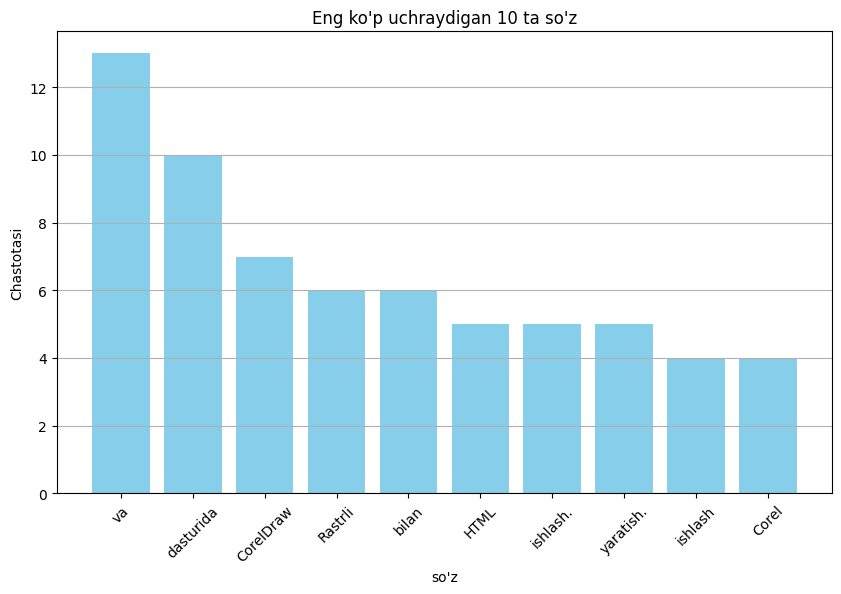

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("kechki.xlsx", header=None)
work_data = df.iloc[:, 3]

work_data = work_data.dropna()

word_count = {}
for sentence in sentences:
    words = sentence.split()
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

top_words = [word for word, count in sorted_word_count[:10]]
word_counts = [count for word, count in sorted_word_count[:10]]

plt.figure(figsize=(10, 6))
plt.bar(top_words, word_counts, color='skyblue')
plt.title("Eng ko'p uchraydigan 10 ta so'z")
plt.xlabel("so'z")
plt.ylabel('Chastotasi')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
